In [53]:
from lenstools.simulations import Gadget2Snapshot
from astropy.table import Table
import numpy as np
from astropy.units import Mpc,m,s
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#Generate random positions and velocities
NumPart = 32**3
x = np.random.normal(loc=7.0,scale=5.0,size=(NumPart,3)) * Mpc
v = np.random.uniform(-1,1,size=(NumPart,3)) * m / s

In [3]:
#Create an empty gadget snapshot

snap = Gadget2Snapshot()

#Put the particles in the snapshot
snap.setPositions(x)
snap.setVelocities(v)

#Generate minimal header
snap.setHeaderInfo()

#Write the snapshot
snap.write("gadget_ic")

dict_keys(['endianness', 'scale_factor', 'redshift', 'Om0', 'Ode0', 'w0', 'wa', 'comoving_distance', 'h', 'box_size', 'num_files', 'num_particles_total', 'num_particles_file', 'num_particles_total_gas', 'num_particles_file_gas', 'num_particles_total_with_mass', 'num_particles_file_with_mass', 'num_particles_total_of_type', 'num_particles_file_of_type', 'npartTotalHighWord', 'masses', 'flag_cooling', 'flag_feedback', 'flag_sfr', 'flag_stellarage', 'flag_metals', 'flag_entropy_instead_u', 'files', 'H0', 'num_particles_total_side']) dict_values([0, 0.009900990099009901, 100.0, 0.26, 0.74, -1.0, 0.0, <Quantity 9329.06538189 Mpc/h>, 0.72, <Quantity 15. Mpc/h>, 1, 32768, 32768, 0, 0, 0, 0, array([    0, 32768,     0,     0,     0,     0], dtype=int32), array([    0, 32768,     0,     0,     0,     0], dtype=int32), array([0, 0, 0, 0, 0, 0], dtype=uint32), <Quantity [0.00e+00, 1.03e+10, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00] solMass>, 0, 0, 0, 0, 0, 0, ['gadget_ic'], <Quantity 72. km / (Mpc 

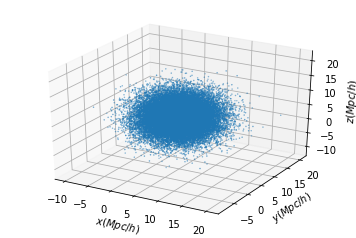

In [82]:
#Open the snapshot
snap = Gadget2Snapshot.open("gadget_ic")

#Visualize the header
ks = snap.header.keys()
v = snap.header.values()

print(ks, v)

#Get positions and velocities
snap.getPositions()
#snap.getVelocities()

#Visualize the snapshot
snap.visualize(s=0.2)
#snap.savefig("snapshot1.png")
snap.close()

In [10]:
image = Image.open('snapshot1.png')
image.show()

In [65]:
snap=  Gadget2Snapshot.open('LensTools Data/gadget/snapshot_001')

In [66]:
#Visualize the header
ks = snap.header.keys()
v = snap.header.values()
print(ks)
print(v)

dict_keys(['endianness', 'scale_factor', 'redshift', 'Om0', 'Ode0', 'w0', 'wa', 'comoving_distance', 'h', 'box_size', 'num_files', 'num_particles_total', 'num_particles_file', 'num_particles_total_gas', 'num_particles_file_gas', 'num_particles_total_with_mass', 'num_particles_file_with_mass', 'num_particles_total_of_type', 'num_particles_file_of_type', 'npartTotalHighWord', 'masses', 'flag_cooling', 'flag_feedback', 'flag_sfr', 'flag_stellarage', 'flag_metals', 'flag_entropy_instead_u', 'files', 'H0', 'num_particles_total_side'])
dict_values([0, 0.25331915267913213, 2.9475893923688217, 0.26, 0.74, -1.0, 0.0, <Quantity 4600.00003756 Mpc/h>, 0.72, <Quantity 15. Mpc/h>, 1, 32768, 32768, 0, 0, 0, 0, array([    0, 32768,     0,     0,     0,     0], dtype=int32), array([    0, 32768,     0,     0,     0,     0], dtype=int32), array([0, 0, 0, 0, 0, 0], dtype=uint32), <Quantity [0.0000000e+00, 1.0322999e+10, 0.0000000e+00, 0.0000000e+00,
           0.0000000e+00, 0.0000000e+00] solMass>, 0, 0

In [67]:
snap.header['num_particles_total']

32768

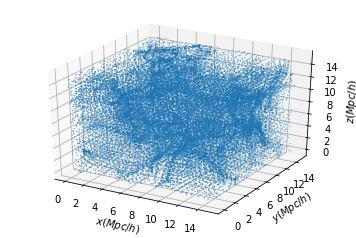

In [81]:
#Get positions and velocities
snap.getPositions()
#snap.getVelocities()

#Visualize the snapshot
snap.visualize(s=0.2)

#snap.savefig("snapshot_gadget2.png")

#image = Image.open('snapshot_gadget2.png')
#image.show()

05-09 14:35:10.582:lenstools.stderr:WARNING: Your grid resolution is too low to compute accurately the power on 19.5 1 / Mpc (maximum recommended 16.71597494078255 1 / Mpc, distortions might start to appear already at 3.0720000000000005 1 / Mpc): results might be inaccurate
/cm/shared/apps/python/intel/intelpython3/3.5.3/envs/jupyterhub/lib/python3.6/site-packages/lenstools/simulations/nbody.py:1339: RuntimeWarning: invalid value encountered in true_divide
  return_tuple = (k,(power_spectrum/hits) * (bin_resolution[0] * bin_resolution[1] * bin_resolution[2])**2 / (self._header["box_size"]**3))


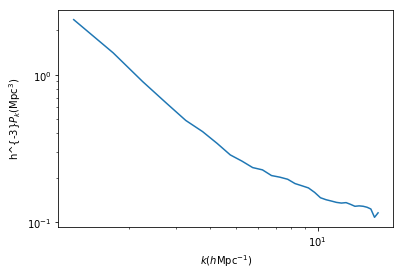

In [63]:
#Measure the power spectrum
k_edges = np.arange(1.0,20.0,0.5) * (1/Mpc)
k,Pk = snap.powerSpectrum(k_edges,resolution=64)

#Plot
fig,ax = plt.subplots()

ax.plot(k,Pk)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"$k(h\mathrm{Mpc}^{-1})$")
ax.set_ylabel(r"h^{-3}$P_k(\mathrm{Mpc}^3)$")
fig.savefig("snapshot_power_spectrum.png")
snap.close()